# Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
from pandas.plotting import table 

%matplotlib inline

import math
import random
from datetime import timedelta
from datetime import date
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#!pip install bioinfokit

# Data Preparation and Cleansing

In [169]:
 df=pd.read_csv('us_accidents\\US_Accidents_Dec19.csv') 

In [170]:
df.dropna(axis=0,how='all',inplace=True)
df.dropna(axis=1,how='all',inplace=True)

In [6]:
# missing value for each variables
nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
nadf.columns = ['variable', 'missing_percentage']
nadf=nadf[nadf['missing_percentage']>0]
nadf

variable  missing_percentage
32            Zipcode              0.0003
33           Timezone              0.0011
34       Airport_Code              0.0019
35  Weather_Timestamp              0.0123
36     Wind_Direction              0.0152
37       Pressure(in)              0.0162
38     Temperature(F)              0.0188
39        Humidity(%)              0.0199
40     Visibility(mi)              0.0221
41  Weather_Condition              0.0222
42    Wind_Speed(mph)              0.1482
43                TMC              0.2448
44      Wind_Chill(F)              0.6229
45             Number              0.6447
46  Precipitation(in)              0.6719
47            End_Lng              0.7552
48            End_Lat              0.7552

<AxesSubplot:xlabel='missing_percentage', ylabel='variable'>

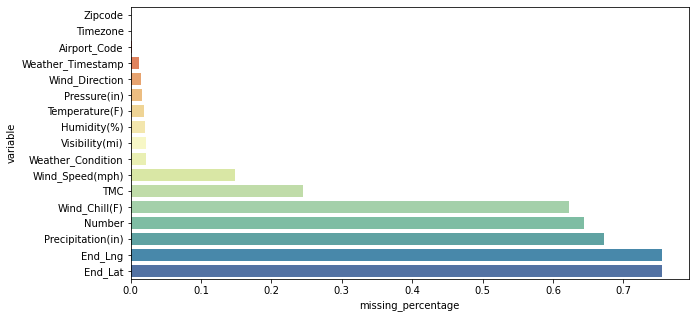

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x="missing_percentage", 
             y='variable',
             data=nadf[:20], 
             palette = "Spectral")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
df.head()

ID    Source    TMC  Severity           Start_Time             End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)                                        Description  Number                     Street Side          City      County State     Zipcode Country    Timezone Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147 -84.058723      NaN      NaN          0.01  Right lane blocked due to accident on I-70 Eas...     NaN                     I-70 E    R        Dayton  Montgomery    OH       45424      US  US/Eastern         KFFO  2016-02-08 05:58:00            36.9            NaN         91.0         29.68            10.0           Calm              NaN               0.02        Light Rain    False  False     False     False     False    False    False       False    False  False            False           False         False          Night          Night             Night                 Night
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059 -82.831184      NaN      NaN          0.01  Accident on Brice Rd at Tussing Rd. Expect del...  2584.0                   Brice Rd    L  Reynoldsburg    Franklin    OH  43068-3402      US  US/Eastern         KCMH  2016-02-08 05:51:00            37.9            NaN        100.0         29.65            10.0           Calm              NaN               0.00        Light Rain    False  False     False     False     False    False    False       False    False  False            False           False         False          Night          Night             Night                   Day
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148 -84.032608      NaN      NaN          0.01  Accident on OH-32 State Route 32 Westbound at ...     NaN             State Route 32    R  Williamsburg    Clermont    OH       45176      US  US/Eastern         KI69  2016-02-08 06:56:00            36.0           33.3        100.0         29.67            10.0             SW              3.5                NaN          Overcast    False  False     False     False     False    False    False       False    False  False            False            True         False          Night          Night               Day                   Day
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753 -84.205582      NaN      NaN          0.01  Accident on I-75 Southbound at Exits 52 52B US...     NaN                     I-75 S    R        Dayton  Montgomery    OH       45417      US  US/Eastern         KDAY  2016-02-08 07:38:00            35.1           31.0         96.0         29.64             9.0             SW              4.6                NaN     Mostly Cloudy    False  False     False     False     False    False    False       False    False  False            False           False         False          Night            Day               Day                   Day
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781 -84.188354      NaN      NaN          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...     NaN  Miamisburg Centerville Rd    R        Dayton  Montgomery    OH       45459      US  US/Eastern         KMGY  2016-02-08 07:53:00            36.0           33.3         89.0         29.65             6.0             SW              3.5                NaN     Mostly Cloudy    False  False     False     False     False    False    False       False    False  False            False            True         False            Day            Day               Day 

# Exploratory Analysis and Visualization

#### Get Initial Information Of Data

In [10]:
#Numeric Columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df.select_dtypes(include=numerics)
numeric_columns 

TMC  Severity  Start_Lat   Start_Lng   End_Lat    End_Lng  Distance(mi)  Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)
0        201.0         3  39.865147  -84.058723       NaN        NaN         0.010     NaN            36.9            NaN         91.0         29.68            10.0              NaN               0.02
1        201.0         2  39.928059  -82.831184       NaN        NaN         0.010  2584.0            37.9            NaN        100.0         29.65            10.0              NaN               0.00
2        201.0         2  39.063148  -84.032608       NaN        NaN         0.010     NaN            36.0           33.3        100.0         29.67            10.0              3.5                NaN
3        201.0         3  39.747753  -84.205582       NaN        NaN         0.010     NaN            35.1           31.0         96.0         29.64             9.0              4.6                NaN
4        201.0         2  39.627781  -84.188354       NaN        NaN         0.010     NaN            36.0           33.3         89.0         29.65             6.0              3.5                NaN
...        ...       ...        ...         ...       ...        ...           ...     ...             ...            ...          ...           ...             ...              ...                ...
2974330    NaN         2  34.002480 -117.379360  33.99888 -117.37094         0.543     NaN            86.0           86.0         40.0         28.92            10.0             13.0               0.00
2974331    NaN         2  32.766960 -117.148060  32.76555 -117.15363         0.338     NaN            70.0           70.0         73.0         29.39            10.0              6.0               0.00
2974332    NaN         2  33.775450 -117.847790  33.77740 -117.85727         0.561     NaN            73.0           73.0         64.0         29.74            10.0             10.0               0.00
2974333    NaN         2  33.992460 -118.403020  33.98311 -118.39565         0.772     NaN            71.0           71.0         81.0         29.62            10.0              8.0               0.00
2974334    NaN         2  34.133930 -117.230920  34.13736 -117.23934         0.537     NaN            79.0           79.0         47.0         28.63             7.0              7.0               0.00

[2974335 rows x 15 columns]

In [11]:
ndf=df.describe()[['Severity','Temperature(F)','Visibility(mi)','Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)']]
ndf

Severity  Temperature(F)  Visibility(mi)  Wind_Chill(F)  Wind_Speed(mph)  Precipitation(in)
count  2.974335e+06    2.918272e+06    2.908644e+06   1.121712e+06     2.533495e+06      975977.000000
mean   2.360190e+00    6.235120e+01    9.150770e+00   5.132685e+01     8.298064e+00           0.020495
std    5.414733e-01    1.878855e+01    2.892114e+00   2.519127e+01     5.138546e+00           0.235770
min    1.000000e+00   -7.780000e+01    0.000000e+00  -6.590000e+01     0.000000e+00           0.000000
25%    2.000000e+00    5.000000e+01    1.000000e+01   3.200000e+01     4.600000e+00           0.000000
50%    2.000000e+00    6.440000e+01    1.000000e+01   5.400000e+01     7.000000e+00           0.000000
75%    3.000000e+00    7.600000e+01    1.000000e+01   7.300000e+01     1.040000e+01           0.000000
max    4.000000e+00    1.706000e+02    1.400000e+02   1.150000e+02     8.228000e+02          25.000000

In [12]:
dfa=df[['ID','Start_Time','State','City','Severity','Weather_Condition', 'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
          'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]

In [13]:
dfa['Start_Time']=pd.to_datetime(df.Start_Time, errors='coerce')
dfa['Date'] = dfa['Start_Time'].dt.normalize()
dfa['Year']=dfa['Start_Time'].dt.year
dfa['Month']=dfa['Start_Time'].dt.month
dfa['Day']=dfa['Start_Time'].dt.day
dfa['Hour']=dfa['Start_Time'].dt.hour
dfa['DayofWeek']=dfa['Start_Time'].dt.dayofweek

In [14]:
# Data collecting time range
print(df.Start_Time.min())
print(df.Start_Time.max())

2015-03-09 07:00:00
2020-01-01 00:50:55


### Cities

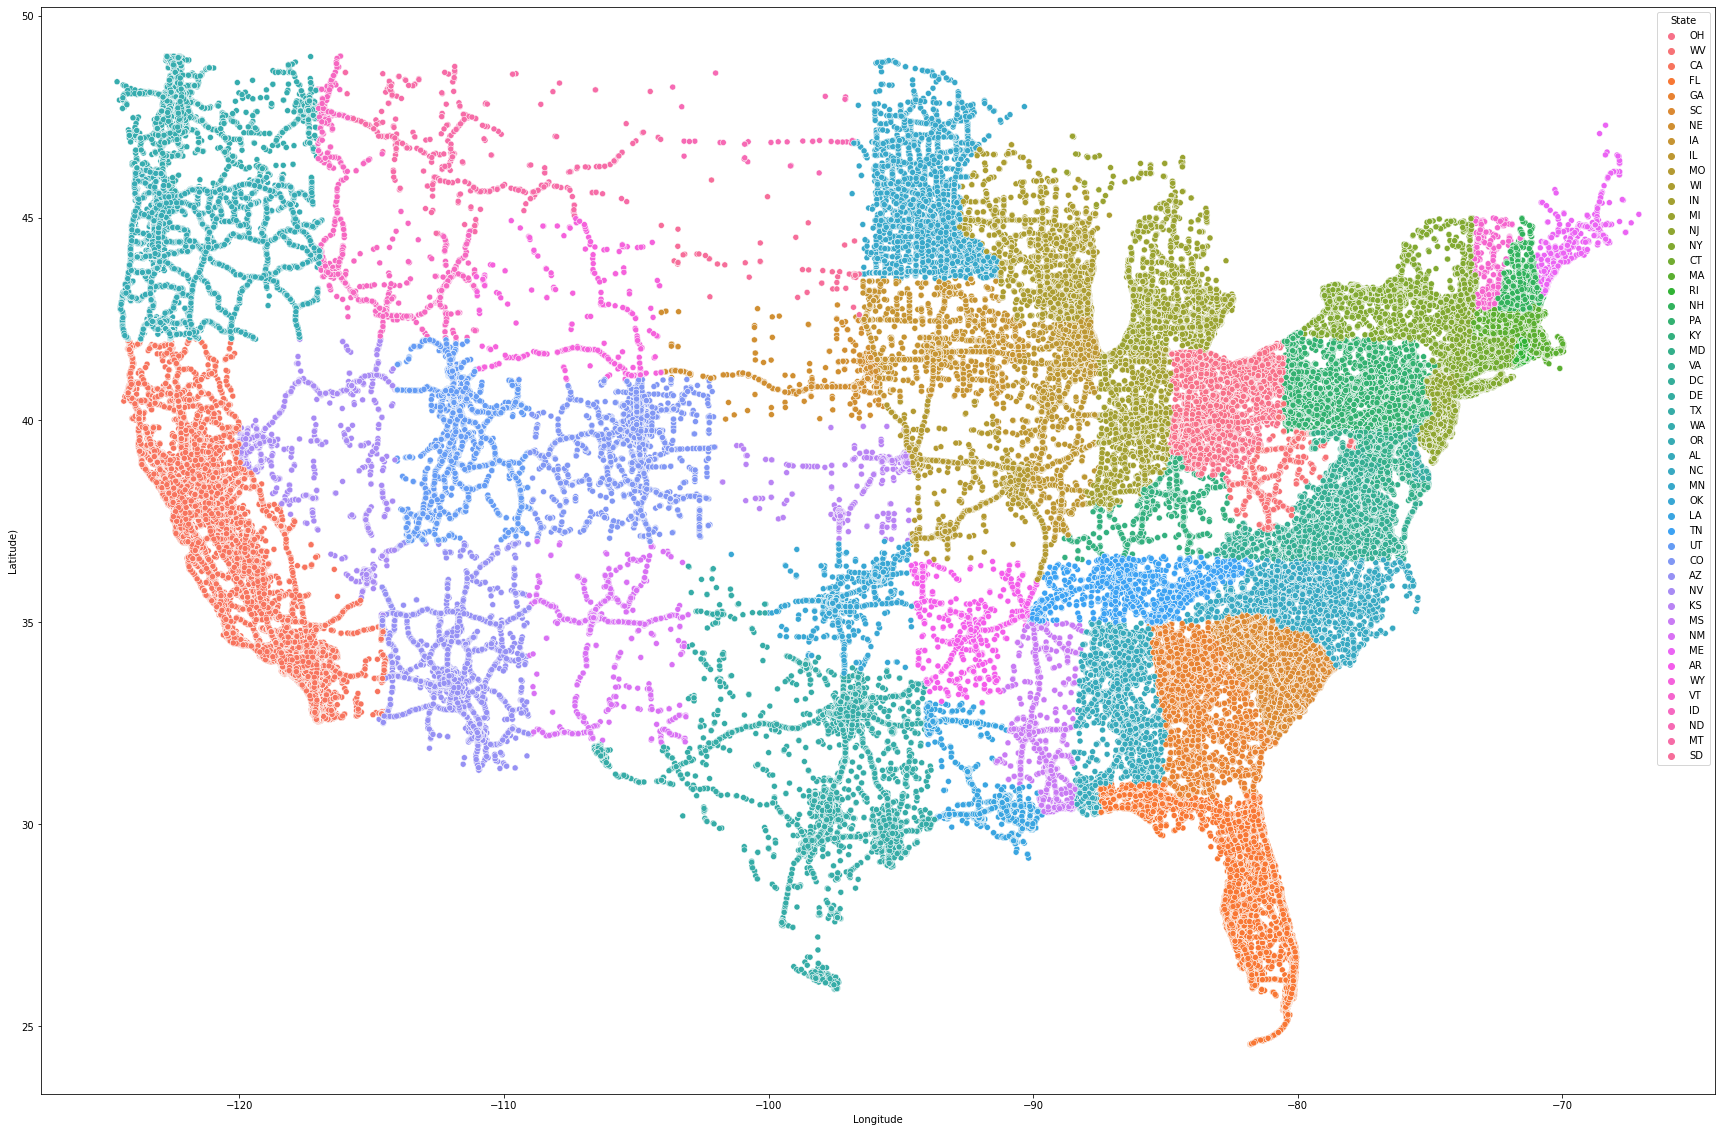

In [15]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

In [16]:
city_accidents=dfa[['State','City']].value_counts().reset_index()
city_accidents.columns=['State','City','Accident_Number']
city_accidents['Combined']=city_accidents['State']+','+city_accidents['City']
print(len(city_accidents))
city_accidents[0:20]

16884


State           City  Accident_Number          Combined
0     TX        Houston            93245        TX,Houston
1     NC      Charlotte            67917      NC,Charlotte
2     CA    Los Angeles            65851    CA,Los Angeles
3     TX         Austin            58553         TX,Austin
4     TX         Dallas            57823         TX,Dallas
5     NC        Raleigh            39623        NC,Raleigh
6     GA        Atlanta            37576        GA,Atlanta
7     FL          Miami            31097          FL,Miami
8     OK  Oklahoma City            30787  OK,Oklahoma City
9     LA    Baton Rouge            30232    LA,Baton Rouge
10    TN      Nashville            27801      TN,Nashville
11    FL        Orlando            26134        FL,Orlando
12    CA     Sacramento            25657     CA,Sacramento
13    WA        Seattle            23745        WA,Seattle
14    AZ        Phoenix            22948        AZ,Phoenix
15    MN    Minneapolis            22150    MN,Minneapolis
16    TX    San Antonio            21613    TX,San Antonio
17    CA      San Diego            21045      CA,San Diego
18    IN   Indianapolis            18244   IN,Indianapolis
19    NE          Omaha            17881          NE,Omaha

Text(0.5, 1.0, 'Top 2000 cities with highest accident volumn')

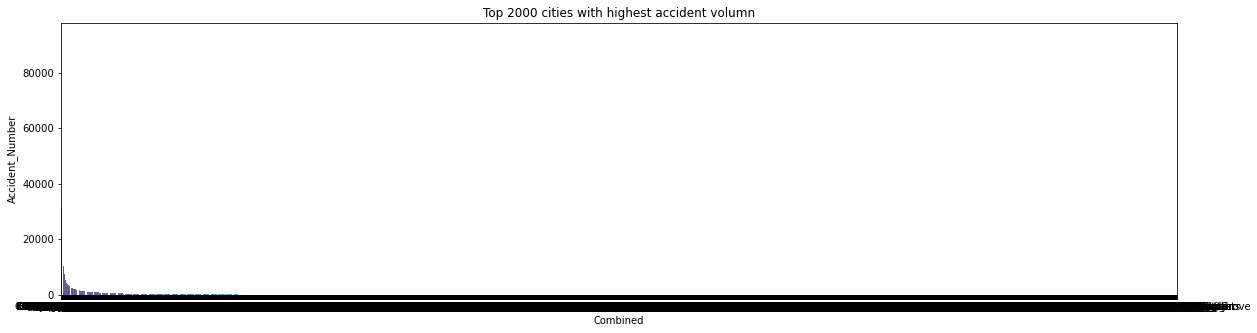

In [17]:
topn=500
topcity=city_accidents[0:topn]

fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(x='Combined', 
             y='Accident_Number',
             data=city_accidents, 
             palette = "Spectral_r")
plt.title('Top 2000 cities with highest accident volumn')

In [18]:
city_accidents.describe()

Accident_Number
count     16884.000000
mean        176.158019
std        1592.893704
min           1.000000
25%           3.000000
50%          10.000000
75%          47.000000
max       93245.000000

In [196]:
city_accidents[city_accidents['Accident_Number']==1]

State         City  Accident_Number        Combined
14461    NC          Ash                1          NC,Ash
14462    VA  Middlebrook                1  VA,Middlebrook
14463    OH      Minster                1      OH,Minster
14464    CA    Lakeshore                1    CA,Lakeshore
14465    DE  Dewey Beach                1  DE,Dewey Beach
...     ...          ...              ...             ...
16879    IA      Moulton                1      IA,Moulton
16880    MI     Germfask                1     MI,Germfask
16881    MI    Gladstone                1    MI,Gladstone
16882    MI   Gould City                1   MI,Gould City
16883    WY      Worland                1      WY,Worland

[2423 rows x 4 columns]

Text(0.5, 1.0, 'Top 200 cities with highest accident volumn')

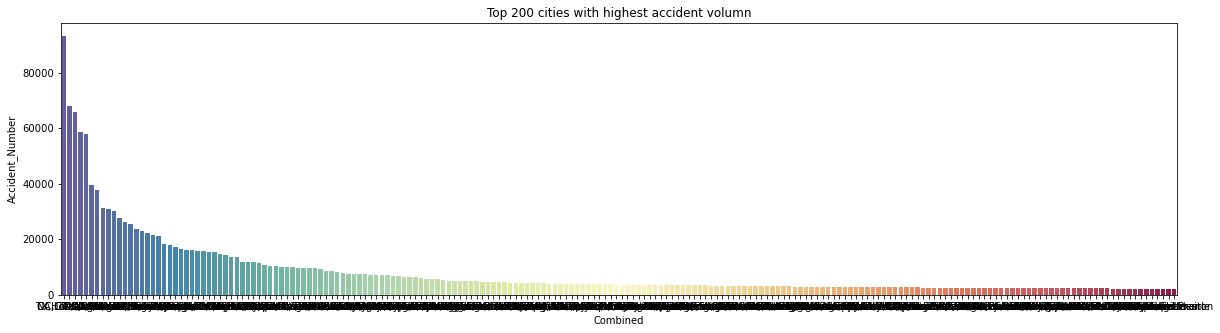

In [20]:
topn=200
topcity=city_accidents[0:topn]

fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(x='Combined', 
             y='Accident_Number',
             data=topcity, 
             palette = "Spectral_r")
plt.title('Top 200 cities with highest accident volumn')

Text(0.5, 1.0, 'Top 200 cities with highest accident volumn')

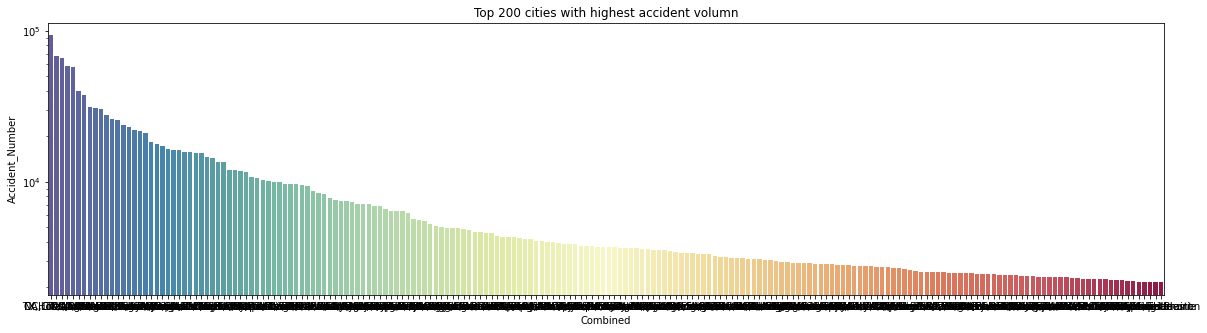

In [21]:
# scaled y axis to log(y)
fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(x='Combined', 
             y='Accident_Number',
             data=topcity, 
             palette = "Spectral_r")
ax.set_yscale('log')
plt.title('Top 200 cities with highest accident volumn')

In [22]:
high_accident_cities=city_accidents[city_accidents['Accident_Number']>=1000]
low_accident_cities=city_accidents[city_accidents['Accident_Number']<1000]

In [23]:
# High Accident Volumn Cities (accident number >=100)
nrows,ncols=high_accident_cities.shape
nrows

462

In [24]:
# Low Accident Volumn Cities (accident number >=100)
nrows,ncols=low_accident_cities.shape
nrows

16422

In [25]:
high_accident_cities[['State','City','Accident_Number']][0:10]

State           City  Accident_Number
0    TX        Houston            93245
1    NC      Charlotte            67917
2    CA    Los Angeles            65851
3    TX         Austin            58553
4    TX         Dallas            57823
5    NC        Raleigh            39623
6    GA        Atlanta            37576
7    FL          Miami            31097
8    OK  Oklahoma City            30787
9    LA    Baton Rouge            30232

In [26]:
city_accidents.describe() 

Accident_Number
count     16884.000000
mean        176.158019
std        1592.893704
min           1.000000
25%           3.000000
50%          10.000000
75%          47.000000
max       93245.000000

In [27]:
# city_accidents[city_accidents==1]

In [28]:
# accidents in the state of New York, data not complete
nydf=pd.DataFrame(df[df['State']=='NY']['City'].value_counts()[:10])
nydf.columns=['Accidents in Cities of New York State']
nydf

Accidents in Cities of New York State
Rochester                                      10844
Bronx                                           9689
Brooklyn                                        7761
New York                                        7127
Albany                                          4003
Buffalo                                         3883
Staten Island                                   2546
Syracuse                                        2337
Yonkers                                         1890
Flushing                                        1750

### States

In [29]:
statedf=city_accidents.groupby(['State']).sum().reset_index()
statedf=statedf.sort_values("Accident_Number", axis = 0, ascending = False).reset_index()
statedf.drop('index',axis=1,inplace=True)
statedf

State  Accident_Number
0     CA           663198
1     TX           298062
2     FL           223719
3     SC           146689
4     NC           142460
..   ...              ...
44    VT              585
45    MT              504
46    WY              492
47    SD               60
48    ND               43

[49 rows x 2 columns]

In [30]:
fig=px.choropleth(statedf,
                 locations='State',
                 locationmode='USA-states',
                 color=np.log(statedf['Accident_Number']),
                 hover_name='State',
                 hover_data=['Accident_Number'],
                 scope="usa",
                 title='Accidents in US', color_continuous_scale=px.colors.sequential.Inferno)
fig.update(layout_coloraxis_showscale=True)
fig.show()

Text(0.5, 1.0, 'State with Accident Numbers')

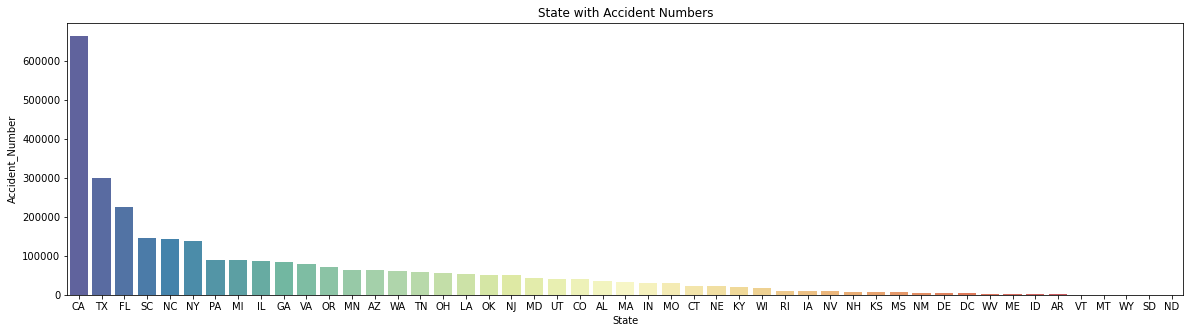

In [31]:
fig, ax = plt.subplots(figsize = (20,5))
sns.barplot(x='State', 
             y='Accident_Number',
             data=statedf, 
             palette = "Spectral_r")
plt.title('State with Accident Numbers')

In [32]:
statedf[:10].reset_index()
statedf

State  Accident_Number
0     CA           663198
1     TX           298062
2     FL           223719
3     SC           146689
4     NC           142460
..   ...              ...
44    VT              585
45    MT              504
46    WY              492
47    SD               60
48    ND               43

[49 rows x 2 columns]

### Hour, Day and Month

In [33]:
timedf=dfa[['Start_Time']].reset_index()
timedf['Date'] = timedf['Start_Time'].dt.normalize()
timedf['Year']=timedf['Start_Time'].dt.year
timedf['Month']=timedf['Start_Time'].dt.month
timedf['Day']=timedf['Start_Time'].dt.day
timedf['Hour']=timedf['Start_Time'].dt.hour
timedf['DayofWeek']=timedf['Start_Time'].dt.dayofweek
timedf.drop('index', axis=1,inplace=True)
timedf

Start_Time       Date  Year  Month  Day  Hour  DayofWeek
0       2016-02-08 05:46:00 2016-02-08  2016      2    8     5          0
1       2016-02-08 06:07:59 2016-02-08  2016      2    8     6          0
2       2016-02-08 06:49:27 2016-02-08  2016      2    8     6          0
3       2016-02-08 07:23:34 2016-02-08  2016      2    8     7          0
4       2016-02-08 07:39:07 2016-02-08  2016      2    8     7          0
...                     ...        ...   ...    ...  ...   ...        ...
2974330 2019-08-23 18:03:25 2019-08-23  2019      8   23    18          4
2974331 2019-08-23 19:11:30 2019-08-23  2019      8   23    19          4
2974332 2019-08-23 19:00:21 2019-08-23  2019      8   23    19          4
2974333 2019-08-23 19:00:21 2019-08-23  2019      8   23    19          4
2974334 2019-08-23 18:52:06 2019-08-23  2019      8   23    18          4

[2974335 rows x 7 columns]

Text(0.5, 1.0, 'Accident number with Hours of the Day')

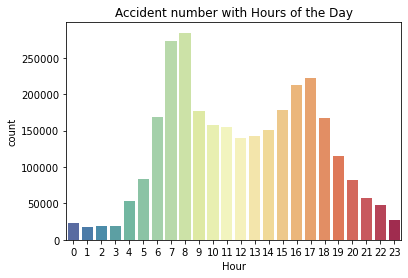

In [34]:
sns.countplot(x=timedf['Hour'], palette = "Spectral_r")
plt.title('Accident number with Hours of the Day')

Text(0.5, 1.0, 'Accident Weekly Counts')

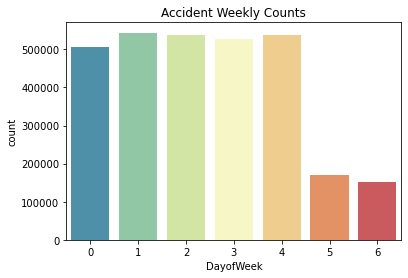

In [35]:
sns.countplot(x=timedf['DayofWeek'],palette = "Spectral_r")
plt.title('Accident Weekly Counts')

Text(0.5, 1.0, 'Sunday Accident Density')

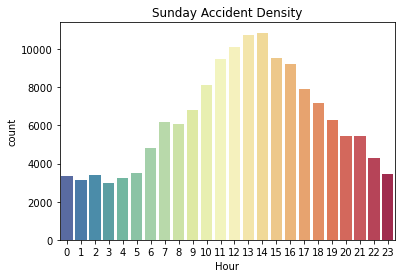

In [36]:
start_time=timedf[timedf['DayofWeek']==6]
# sns.histplot(data=start_time.dt.hour, bins=24)
sns.countplot(x="Hour", data=start_time, orient = 'v', palette = "Spectral_r")


plt.title('Sunday Accident Density')

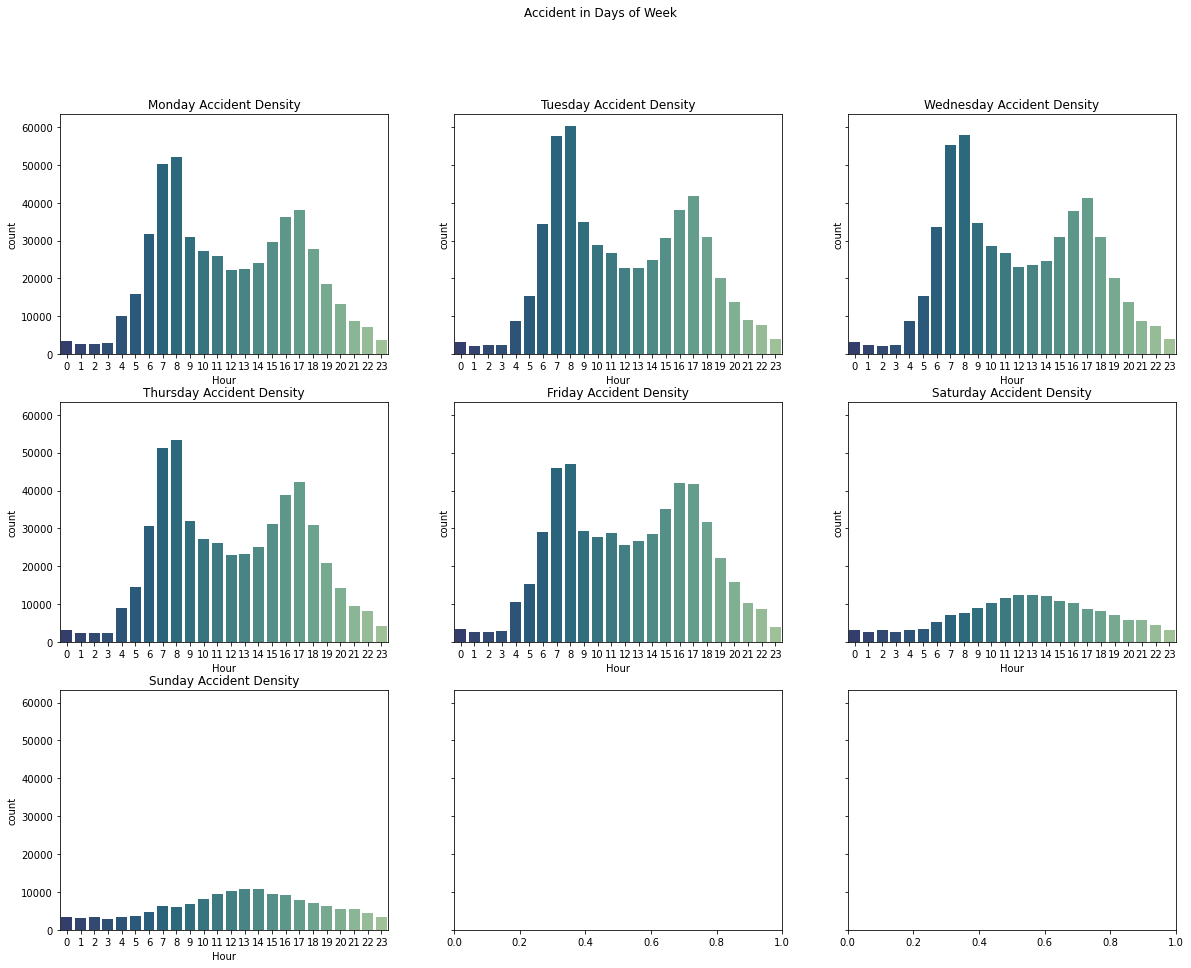

In [37]:
daysofweek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharey=True)
fig.suptitle('Accident in Days of Week')

    
for i in range(3):  
    for j in range(3):
        if  not (i==2 and (j==2 or j==1)):
            start_time=timedf[timedf.Start_Time.dt.dayofweek==(j%3+3*i)]
            
            sns.countplot(ax=axes[i,j], x='Hour', data=start_time, palette = "crest_r")
            axes[i, j].set_title(daysofweek[j%3+3*i]+' Accident Density')
    

Text(0.5, 1.0, 'Accident Monthly Counts')

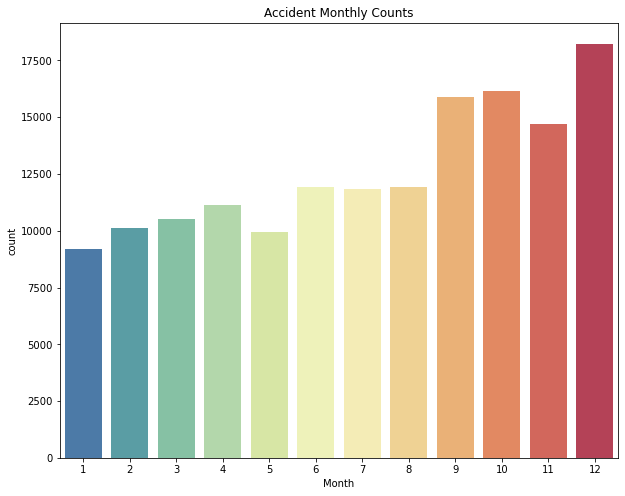

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month', data=start_time, palette = "Spectral_r")
plt.title('Accident Monthly Counts')

### Weather Condition

In [39]:
dfa['Weather_Condition'].value_counts().reset_index()[:50]

index  Weather_Condition
0                   Clear             808171
1           Mostly Cloudy             412528
2                Overcast             382480
3                    Fair             335289
4           Partly Cloudy             295439
..                    ...                ...
45      N/A Precipitation                201
46     Heavy Rain / Windy                158
47     Light Rain Showers                157
48  Heavy T-Storm / Windy                146
49        Widespread Dust                129

[50 rows x 2 columns]

In [40]:
weatherdf=dfa.groupby(['Weather_Condition']).count().reset_index()
weatherdf=weatherdf[['Weather_Condition','ID']]
weatherdf=weatherdf.rename(columns={"ID": "Accident_Number"})

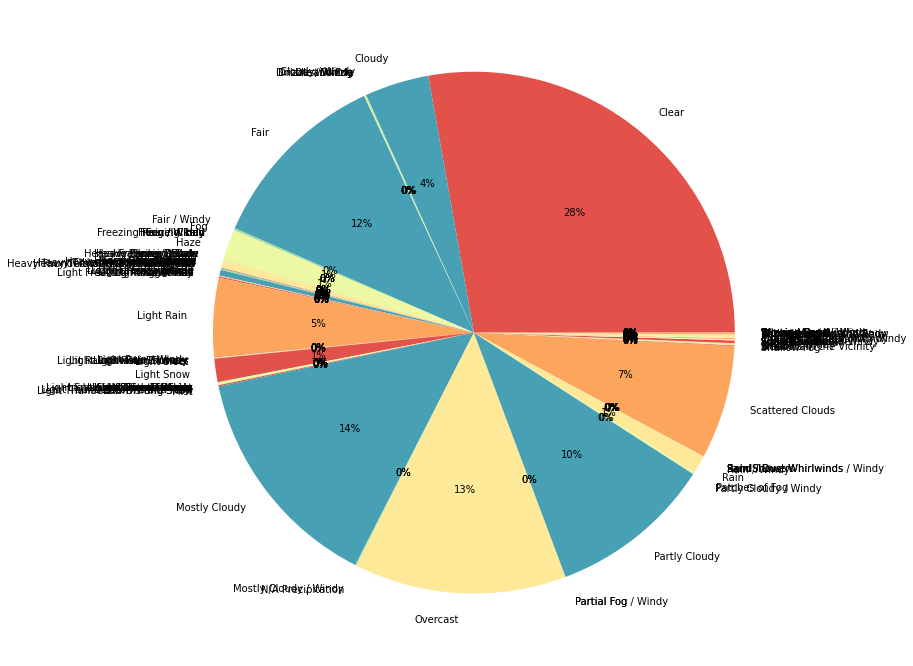

In [41]:
plt.figure(figsize=(12,12))
colors = sns.color_palette('Spectral_r')

plt.pie(weatherdf['Accident_Number'], labels = weatherdf['Weather_Condition'], colors=colors, autopct='%.0f%%')
plt.show()

In [42]:
fig=px.treemap(weatherdf,
              path=['Weather_Condition'],
               values='Accident_Number',
               height=700,
              title='Weather Conditions',
              color_discrete_sequence=px.colors.qualitative.Dark2)

fig.data[0].textinfo='label+text+value'
fig.show()

### Road Condition

In [43]:
rcdf=dfa[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
          'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']].sum().reset_index()
rcdf.columns=['Road_Condition','Accident_Number']
rcdf

Road_Condition  Accident_Number
0           Amenity            35220
1              Bump              454
2          Crossing           207590
3          Give_Way             7627
4          Junction           238447
5           No_Exit             3395
6           Railway            25161
7        Roundabout              168
8           Station            56413
9              Stop            40160
10  Traffic_Calming             1111
11   Traffic_Signal           503383
12     Turning_Loop                0

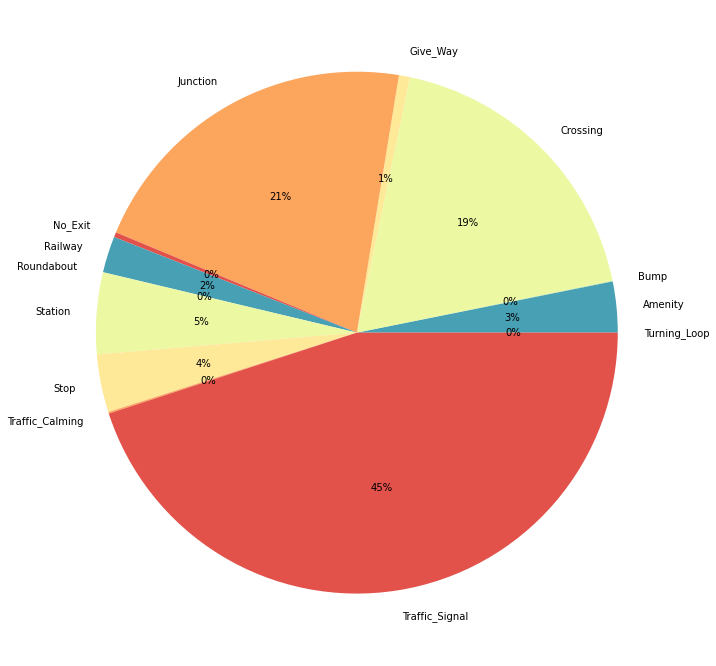

In [44]:
plt.figure(figsize=(12,12))
colors = sns.color_palette('Spectral_r')

plt.pie(rcdf['Accident_Number'], labels = rcdf['Road_Condition'], colors=colors, autopct='%.0f%%')
plt.show()

In [45]:
fig=px.treemap(rcdf,
              path=['Road_Condition'],
               values='Accident_Number',
               height=700,
              title='Road Conditions',
              color_discrete_sequence=px.colors.qualitative.Dark2)

fig.data[0].textinfo='label+text+value'
fig.show()

In [46]:
import os
if not os.path.exists('images'):
    os.mkdir('images')
fig.write_image('images/road_condition.png')
# fig.write_image('images/fig.jpeg')
# fig.write_image('images/fig.pdf')

### Severity

In [47]:

dfa

ID          Start_Time State          City  Severity Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop       Date  Year  Month  Day  Hour  DayofWeek
0              A-1 2016-02-08 05:46:00    OH        Dayton         3        Light Rain    False  False     False     False     False    False    False       False    False  False            False           False         False 2016-02-08  2016      2    8     5          0
1              A-2 2016-02-08 06:07:59    OH  Reynoldsburg         2        Light Rain    False  False     False     False     False    False    False       False    False  False            False           False         False 2016-02-08  2016      2    8     6          0
2              A-3 2016-02-08 06:49:27    OH  Williamsburg         2          Overcast    False  False     False     False     False    False    False       False    False  False            False            True         False 2016-02-08  2016      2    8     6          0
3              A-4 2016-02-08 07:23:34    OH        Dayton         3     Mostly Cloudy    False  False     False     False     False    False    False       False    False  False            False           False         False 2016-02-08  2016      2    8     7          0
4              A-5 2016-02-08 07:39:07    OH        Dayton         2     Mostly Cloudy    False  False     False     False     False    False    False       False    False  False            False            True         False 2016-02-08  2016      2    8     7          0
...            ...                 ...   ...           ...       ...               ...      ...    ...       ...       ...       ...      ...      ...         ...      ...    ...              ...             ...           ...        ...   ...    ...  ...   ...        ...
2974330  A-2974354 2019-08-23 18:03:25    CA     Riverside         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    18          4
2974331  A-2974355 2019-08-23 19:11:30    CA     San Diego         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    19          4
2974332  A-2974356 2019-08-23 19:00:21    CA        Orange         2     Partly Cloudy    False  False     False     False      True    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    19          4
2974333  A-2974357 2019-08-23 19:00:21    CA   Culver City         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    19          4
2974334  A-2974358 2019-08-23 18:52:06    CA      Highland         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    18          4

[2974335 rows x 25 columns]

In [48]:
severitydf=dfa['Severity'].value_counts().reset_index()
severitydf

index  Severity
0      2   1993410
1      3    887620
2      4     92337
3      1       968

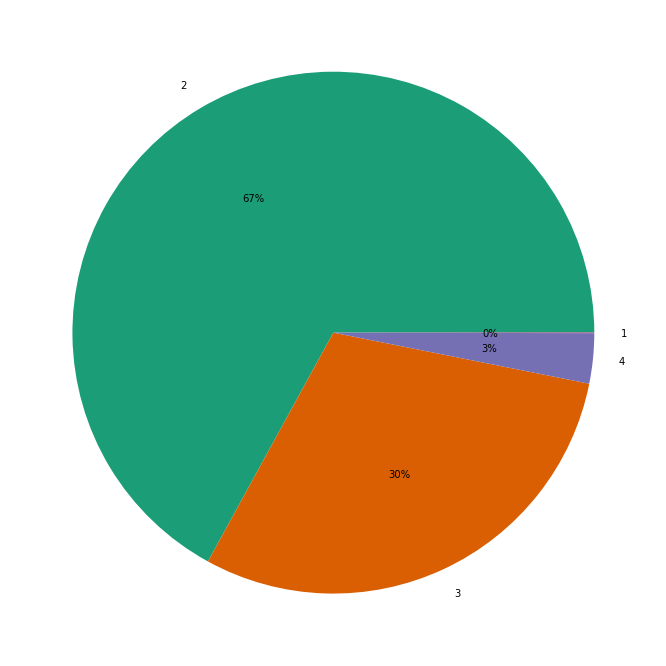

In [49]:
plt.figure(figsize=(12,12))
colors = sns.color_palette('Dark2')

plt.pie(severitydf['Severity'], labels = severitydf['index'], colors=colors, autopct='%.0f%%')
plt.show()

In [50]:
fig=px.treemap(severitydf,
              path=['index'],
               values='Severity',
               height=700,
              title='Severity',
              color_discrete_sequence=px.colors.qualitative.Dark2)

fig.data[0].textinfo='label+text+value'
fig.show()

In [51]:
topnw=15
l=dfa['Weather_Condition'].value_counts().iloc[:topnw].index
dfw=dfa[dfa['Weather_Condition'].isin(l)]
dfw

ID          Start_Time State          City  Severity Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop       Date  Year  Month  Day  Hour  DayofWeek
0              A-1 2016-02-08 05:46:00    OH        Dayton         3        Light Rain    False  False     False     False     False    False    False       False    False  False            False           False         False 2016-02-08  2016      2    8     5          0
1              A-2 2016-02-08 06:07:59    OH  Reynoldsburg         2        Light Rain    False  False     False     False     False    False    False       False    False  False            False           False         False 2016-02-08  2016      2    8     6          0
2              A-3 2016-02-08 06:49:27    OH  Williamsburg         2          Overcast    False  False     False     False     False    False    False       False    False  False            False            True         False 2016-02-08  2016      2    8     6          0
3              A-4 2016-02-08 07:23:34    OH        Dayton         3     Mostly Cloudy    False  False     False     False     False    False    False       False    False  False            False           False         False 2016-02-08  2016      2    8     7          0
4              A-5 2016-02-08 07:39:07    OH        Dayton         2     Mostly Cloudy    False  False     False     False     False    False    False       False    False  False            False            True         False 2016-02-08  2016      2    8     7          0
...            ...                 ...   ...           ...       ...               ...      ...    ...       ...       ...       ...      ...      ...         ...      ...    ...              ...             ...           ...        ...   ...    ...  ...   ...        ...
2974330  A-2974354 2019-08-23 18:03:25    CA     Riverside         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    18          4
2974331  A-2974355 2019-08-23 19:11:30    CA     San Diego         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    19          4
2974332  A-2974356 2019-08-23 19:00:21    CA        Orange         2     Partly Cloudy    False  False     False     False      True    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    19          4
2974333  A-2974357 2019-08-23 19:00:21    CA   Culver City         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    19          4
2974334  A-2974358 2019-08-23 18:52:06    CA      Highland         2              Fair    False  False     False     False     False    False    False       False    False  False            False           False         False 2019-08-23  2019      8   23    18          4

[2853809 rows x 25 columns]

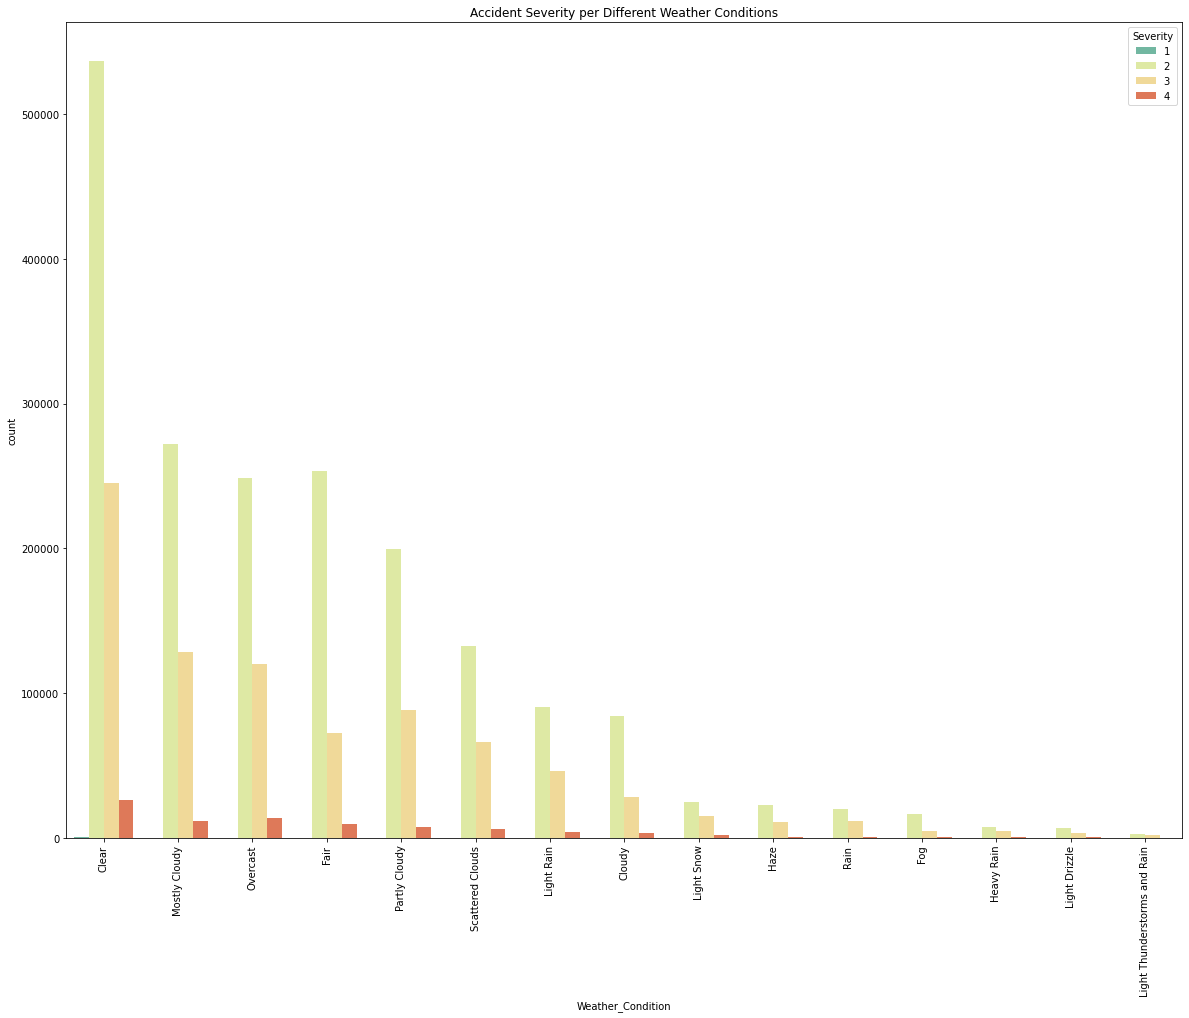

In [52]:
plt.figure(figsize=(20,15))
sns.countplot(x='Weather_Condition',
              data=dfw, 
              order=l,
              hue='Severity', 
              palette = "Spectral_r")
plt.xticks(rotation=90)
plt.title('Accident Severity per Different Weather Conditions');

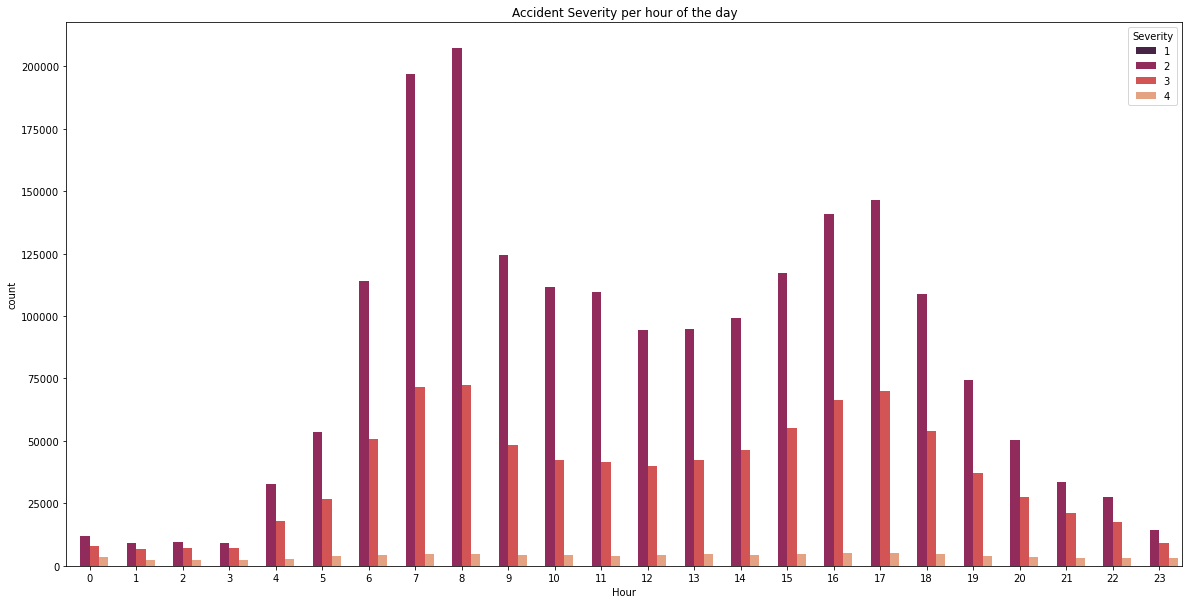

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(x='Hour',data=dfa, hue='Severity', palette = "rocket")
plt.title('Accident Severity per hour of the day');

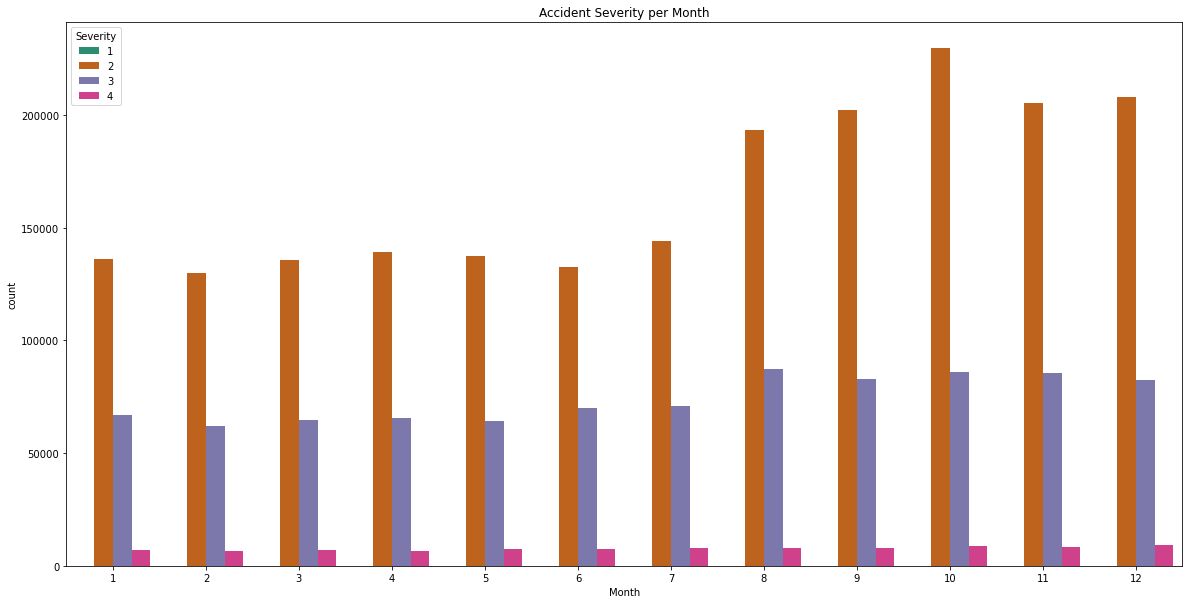

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(x='Month',data=dfa, hue='Severity', palette = "Dark2")
plt.title('Accident Severity per Month');

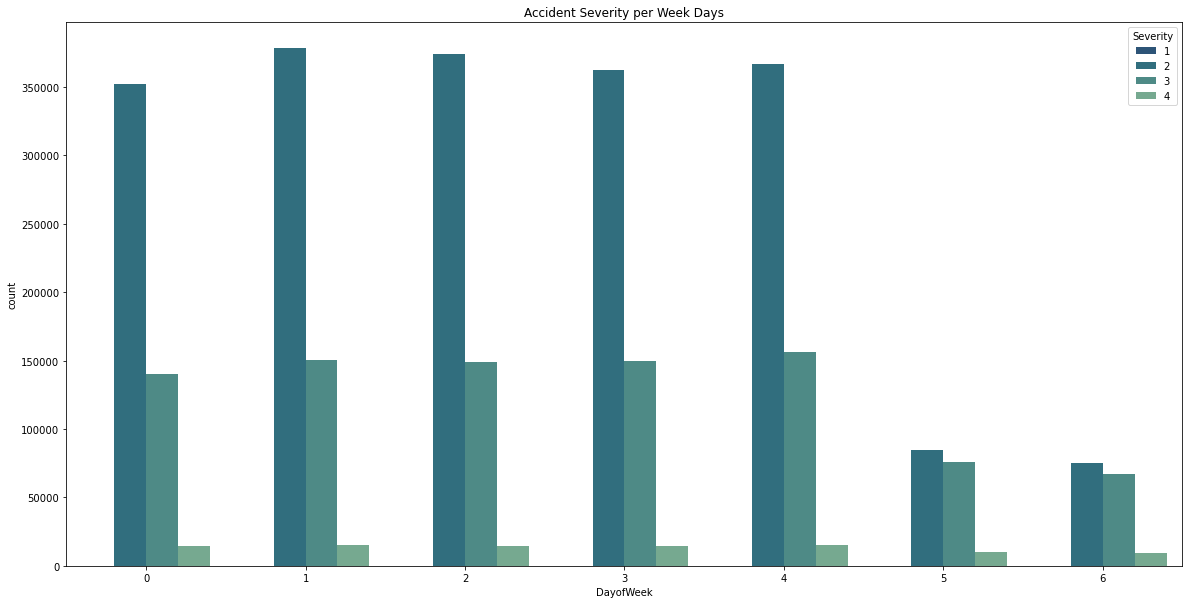

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(data=dfa,x='DayofWeek', hue='Severity', palette = "crest_r")
plt.title('Accident Severity per Week Days');

In [56]:
severityr=dfa[['Severity','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
           'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]
severityr=severityr.groupby('Severity').sum().reset_index()
# severityr.columns=['Road_Condition','Accident_Number']
severityr

Severity  Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop
0         1       19     0        87         1        13        3        7           0       28     29                0             164             0
1         2    31924   403    189267      5820    135204     2623    20174         160    48496  37070              951          447871             0
2         3     2424    47     14562      1503     92817      677     4381           2     6875   1924              131           47481             0
3         4      853     4      3674       303     10413       92      599           6     1014   1137               29            7867             0

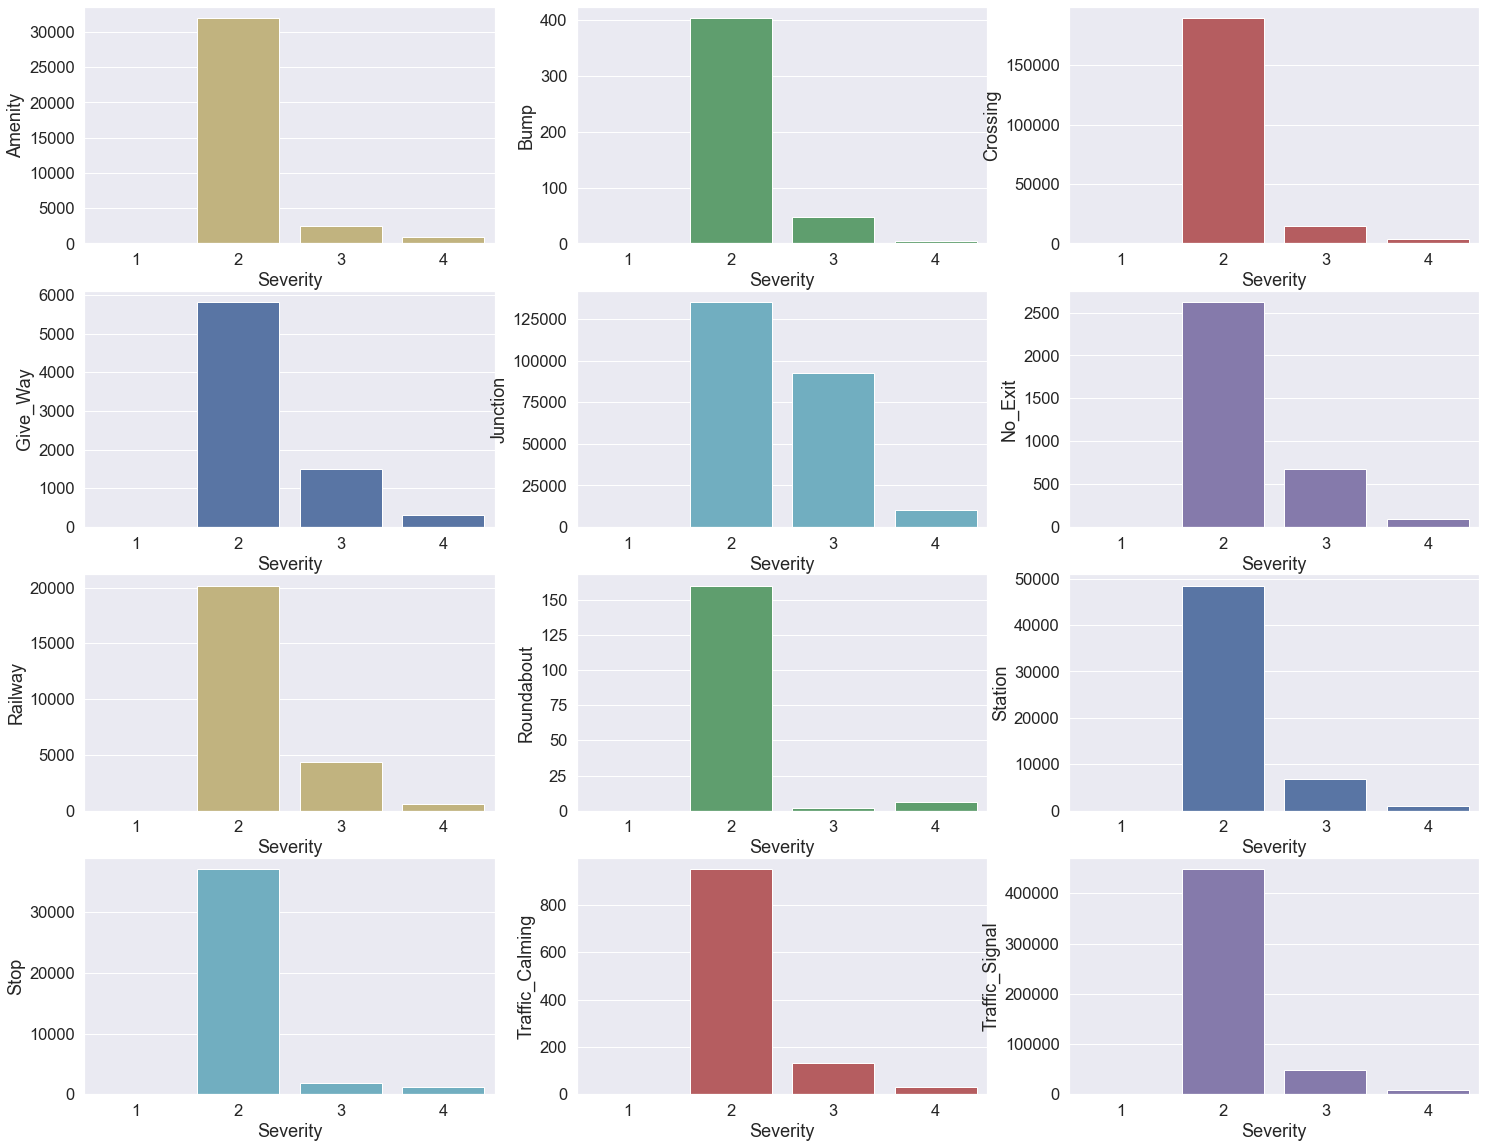

In [57]:
sns.set(style="darkgrid",font_scale=1.5)
f,axes=plt.subplots(4,3,figsize=(25,20))

sns.set(style="darkgrid",font_scale=1.5)

sns.barplot(ax=axes[0,0],data=severityr,y='Amenity', x='Severity', color="y")
sns.barplot(ax=axes[0,1],data=severityr,y='Bump', x='Severity', color="g")
sns.barplot(ax=axes[0,2],data=severityr,y='Crossing', x='Severity', color="r")
sns.barplot(ax=axes[1,0],data=severityr,y='Give_Way', x='Severity', color="b")
sns.barplot(ax=axes[1,1],data=severityr,y='Junction', x='Severity', color="c")
sns.barplot(ax=axes[1,2],data=severityr,y='No_Exit', x='Severity', color="m")
sns.barplot(ax=axes[2,0],data=severityr,y='Railway', x='Severity', color="y")
sns.barplot(ax=axes[2,1],data=severityr,y='Roundabout', x='Severity', color="g")
sns.barplot(ax=axes[2,2],data=severityr,y='Station', x='Severity', color="b")
sns.barplot(ax=axes[3,0],data=severityr,y='Stop', x='Severity', color="c")
sns.barplot(ax=axes[3,1],data=severityr,y='Traffic_Calming', x='Severity', color="r")
sns.barplot(ax=axes[3,2],data=severityr,y='Traffic_Signal', x='Severity', color="m") 

plt.show()

In [96]:
timetrend1=dfa[['ID','Severity','Date','Year','Month','Day','State']]
timetrend=timetrend1[['Date','Severity']].value_counts().reset_index()
timetrend=timetrend.sort_values(by=['Date','Severity'])
timetrend.columns=['Date','Severity','Accident_Counts']
timetrend['Severity'] = pd.Categorical(timetrend['Severity'])

In [97]:
timetrend1=timetrend[['Date']].value_counts().reset_index()
fig=px.line(timetrend, 
            x='Date', 
            y='Accident_Counts',
           color='Severity',
           height=600,
           title='Recovered',
           color_discrete_sequence=['deeppink','mediumseagreen','orange','maroon'])
fig.show()

In [60]:
# timetrend1=timetrend[['Start_Time']].value_counts().reset_index()
# fig = px.scatter(timetrend
#                  , x='Start_Time'
#                  , y='Accident_Counts'
#                  , color='Severity'
#                  , trendline='ols'
#                  )
# fig.show()

In [83]:
timetrend.tail()

Date Severity  Accident_Counts
1822 2019-12-31        3              553
3446 2019-12-31        4               67
4237 2020-01-01        2                3
4484 2020-01-01        3                1
4308 2020-01-01        4                2

Text(0.5, 1.0, '')

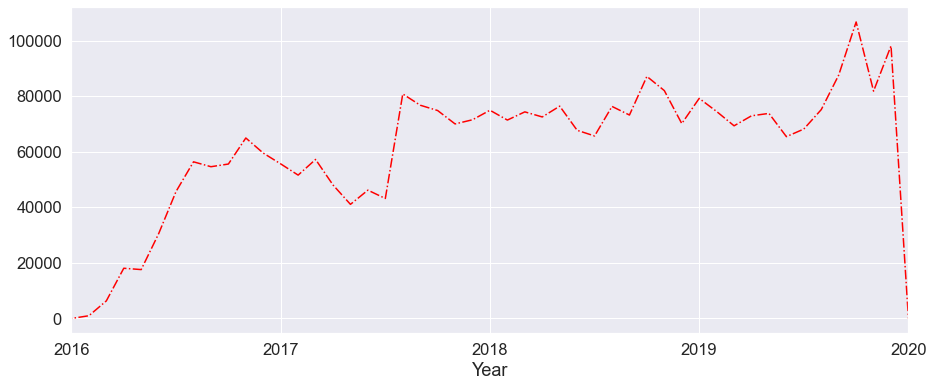

In [95]:
fig= plt.figure(figsize=(15,6))

timetrend.set_index('Date').resample('M')['Accident_Counts'].sum().plot(linestyle='dashdot', color='red')
timetrend.set_index('Date').resample('M')['Accident_Counts'].sum().plot(linestyle='dashdot', color='red')
timetrend.set_index('Date').resample('M')['Accident_Counts'].sum().plot(linestyle='dashdot', color='red')
timetrend.set_index('Date').resample('M')['Accident_Counts'].sum().plot(linestyle='dashdot', color='red')
    
plt.xlim('2016','2020-Jan')
plt.xlabel('Year')
plt.title('')


In [104]:
timetrend=dfa[['ID','Severity','Date','Year','Month','Day','State']]
timetrend=timetrend[['State','Date','Severity']].value_counts().reset_index()
timetrend=timetrend.sort_values(by=['State','Date','Severity'])
timetrend.columns=['State','Date','Severity','Accident_Counts']
timetrend['Severity'] = pd.Categorical(timetrend['Severity'])

In [105]:
timetrendca=timetrend[timetrend['State']=='CA']
timetrendtx=timetrend[timetrend['State']=='TX']

In [106]:
fig=px.line(timetrendtx, 
            x='Date', 
            y='Accident_Counts',
           color='Severity',
           height=600,
           title='Recovered',
           color_discrete_sequence=['deeppink','mediumseagreen','orange','maroon'])
fig.show()

Text(0.5, 1.0, '')

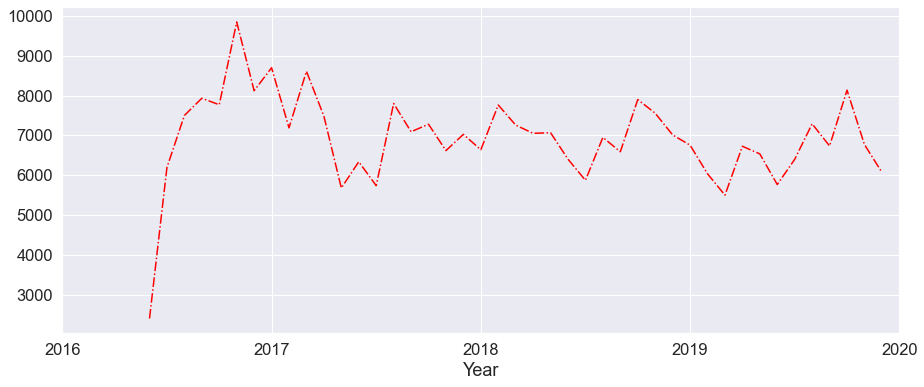

In [107]:
fig= plt.figure(figsize=(15,6))

timetrendtx.set_index('Date').resample('M')['Accident_Counts'].sum().plot(linestyle='dashdot', color='red')
    
plt.xlim('2016','2020-Jan')
plt.xlabel('Year')
plt.title('')

In [ ]:
import os
if not os.path.exists('images'):
    os.mkdir('images')
fig.write_image('images/timetrend.png')

### ANOVA
Check Weekday's accidents with Severity=4 are equal or not

In [ ]:
# Check Weekday's accidents with Severity=4 are equal or not
# one way ANOVA

In [133]:
mask=(dfa['Severity']==4) &  (dfa['State']=='TX')
mask1=dfa['Severity']==4
severitym=dfa[mask1]
severitym=severitym[['ID','Year','Month','Day','DayofWeek']]
severitym1=severitym[['Year','Month','Day','DayofWeek']].value_counts().reset_index()
severitym1.columns=['Year','Month','Day','DayofWeek','Accident_count']

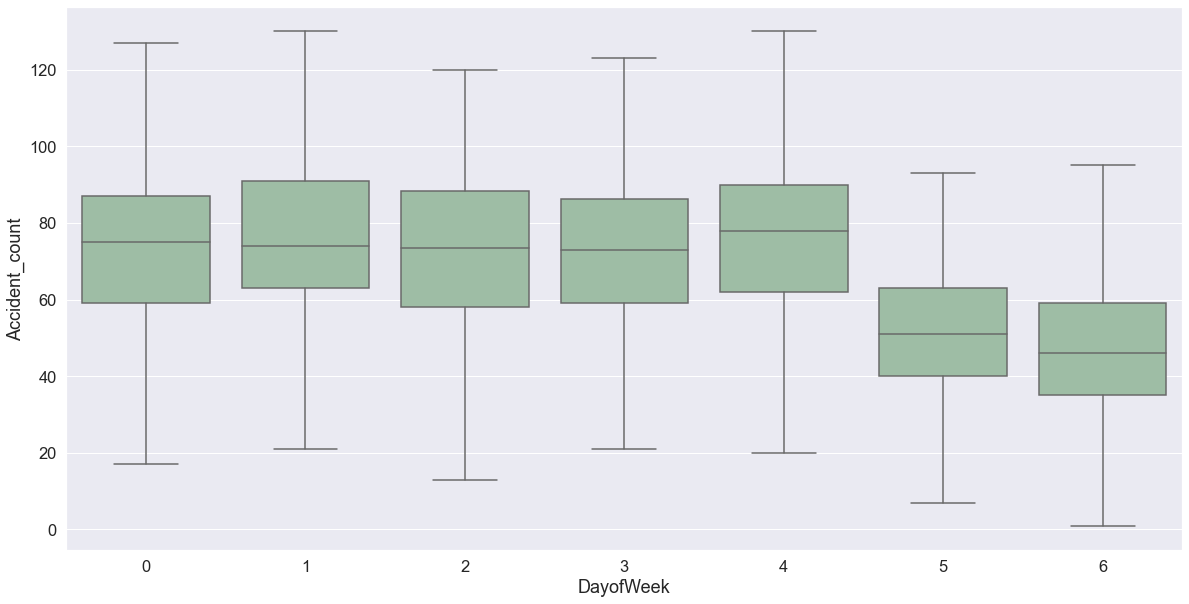

In [134]:
plt.figure(figsize=(20,10)) 
ax = sns.boxplot(x='DayofWeek', y='Accident_count', data=severitym1, color='#99c2a2', showfliers=False)
plt.show()

In [135]:
severitym1[severitym1['DayofWeek']==0]

Year  Month  Day  DayofWeek  Accident_count
1     2018      2    5          0             147
5     2018     11   19          0             130
8     2019      4   22          0             127
12    2019      8   26          0             123
15    2019      1    7          0             123
...    ...    ...  ...        ...             ...
1407  2016      2   29          0               2
1410  2016      9   19          0               1
1414  2016      3   14          0               1
1415  2016      2    8          0               1
1416  2015      3    9          0               1

[205 rows x 5 columns]

In [205]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(severitym1[severitym1['DayofWeek']==0]['Accident_count'],
                                severitym1[severitym1['DayofWeek']==1]['Accident_count'],
                                severitym1[severitym1['DayofWeek']==2]['Accident_count'],
                               severitym1[severitym1['DayofWeek']==3]['Accident_count'],
                               severitym1[severitym1['DayofWeek']==4]['Accident_count'],
                               severitym1[severitym1['DayofWeek']==5]['Accident_count'],
                               severitym1[severitym1['DayofWeek']==6]['Accident_count'])

model = ols('Accident_count ~ C(DayofWeek)', data=severitym1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table



sum_sq      df          F        PR(>F)
C(DayofWeek)  149636.322426     6.0  39.796007  6.708338e-45
Residual      883619.693100  1410.0        NaN           NaN

In [206]:
res = stat()
res.anova_stat(df=severitym1, res_var='DayofWeek', anova_model='Accident_count ~ C(DayofWeek)')
res.anova_summary

df         sum_sq       mean_sq          F        PR(>F)
C(DayofWeek)     6.0  149636.322426  24939.387071  39.796007  6.708338e-45
Residual      1410.0  883619.693100    626.680633        NaN           NaN

In [207]:
res = stat()
res.tukey_hsd(df=severitym1, res_var='Accident_count', xfac_var='DayofWeek', anova_model='Accident_count ~ C(DayofWeek)')
acs=res.tukey_summary

In [201]:
def style_sig(v, props=''):
    return props if (v < 0.05) and (v > 0) else None

s2 = acs.style.applymap(style_sig, props='color:red;background-color: yellow')
s2

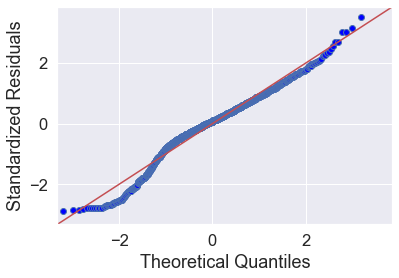

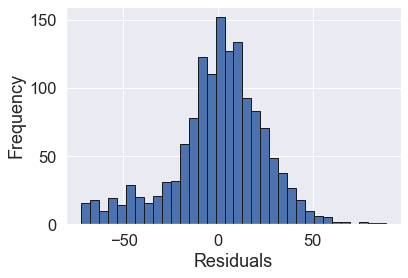

In [208]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [209]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9703616499900818 1.8180780030826327e-16


In [210]:
w, pvalue = stats.shapiro(model.resid)
a=pd.DataFrame([pvalue])
a.columns=['p-value']
a

p-value
0  1.818078e-16

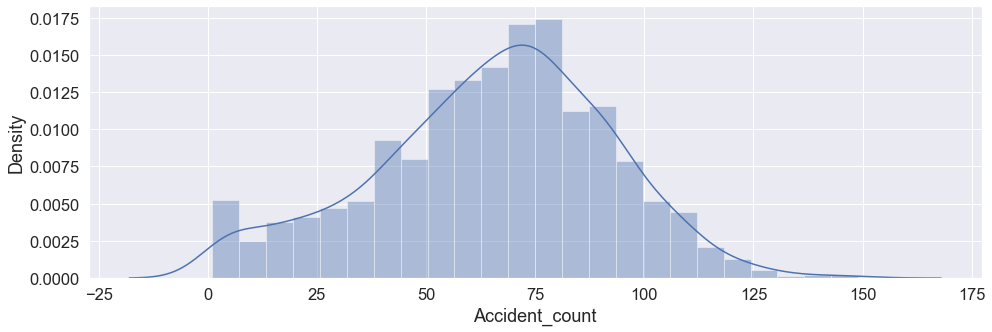

In [123]:
plt.figure(figsize=(16,5))
sns.distplot(severitym1['Accident_count'])
plt.show()

In [124]:
print("Highest allowed",severitym1['Accident_count'].mean() + 2*severitym1['Accident_count'].std())
print("Lowest allowed",severitym1['Accident_count'].mean() - 2*severitym1['Accident_count'].std())

Highest allowed 119.18966720807715
Lowest allowed 11.137785156072468


In [138]:
severitym1[(severitym1['Accident_count'] > 119.19) | (severitym1['Accident_count'] < 11.13)]


Year  Month  Day  DayofWeek  Accident_count
0     2018     11   15          3             149
1     2018      2    5          0             147
2     2019     12   10          1             141
3     2016     12   17          5             139
4     2018     12   21          4             135
...    ...    ...  ...        ...             ...
1412  2016      5    8          6               1
1413  2016      4   15          4               1
1414  2016      3   14          0               1
1415  2016      2    8          0               1
1416  2015      3    9          0               1

[83 rows x 5 columns]

In [148]:
new_severitym1 = severitym1[(severitym1['Accident_count'] < 119.18966720807715) & (severitym1['Accident_count'] > 11.137785156072468)]

maskstart = (new_severitym1['Year'] >= 2016) & (new_severitym1['Month'] >= 7)
maskend = (new_severitym1['Year'] <= 2019) & (new_severitym1['Month'] <= 11)
mask=maskstart & maskend
new_severitym1=new_severitym1[mask]
new_severitym1

Year  Month  Day  DayofWeek  Accident_count
21    2018     10   31          2             118
22    2018     10   30          1             118
23    2018     10   26          4             117
30    2018     11    6          1             114
36    2019     10   10          3             112
...    ...    ...  ...        ...             ...
1308  2019     11   23          5              20
1313  2017      7   23          6              20
1341  2019     11   24          6              15
1344  2016      7   17          6              14
1349  2019     11   29          4              13

[596 rows x 5 columns]

In [150]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(new_severitym1[new_severitym1['DayofWeek']==0]['Accident_count'],
                                new_severitym1[new_severitym1['DayofWeek']==1]['Accident_count'],
                                new_severitym1[new_severitym1['DayofWeek']==2]['Accident_count'],
                               new_severitym1[new_severitym1['DayofWeek']==3]['Accident_count'],
                               new_severitym1[new_severitym1['DayofWeek']==4]['Accident_count'],
                               new_severitym1[new_severitym1['DayofWeek']==5]['Accident_count'],
                               new_severitym1[new_severitym1['DayofWeek']==6]['Accident_count'])
print(fvalue, pvalue )
model = ols('Accident_count ~ C(DayofWeek)', data=new_severitym1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


30.30898134839817 9.599595169859941e-32


sum_sq     df          F        PR(>F)
C(DayofWeek)   62400.987041    6.0  30.308981  9.599595e-32
Residual      202108.306583  589.0        NaN           NaN

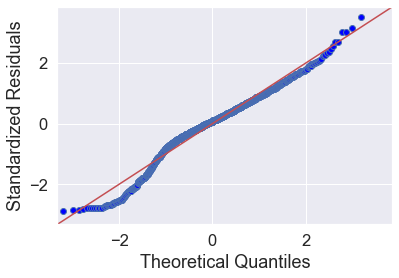

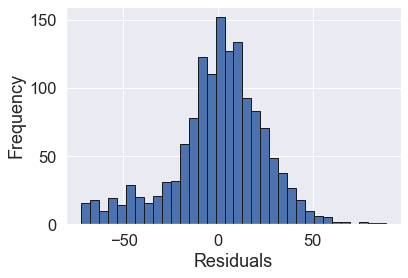

In [151]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [152]:
w, pvalue = stats.shapiro(model.resid)
a=pd.DataFrame([pvalue])
a.columns=['p-value']
a

p-value
0  0.480632

In [165]:
            
import scipy.stats as stats
w, pvalue = stats.bartlett(new_severitym1[new_severitym1['DayofWeek']==0]['Accident_count'],
                           new_severitym1[new_severitym1['DayofWeek']==1]['Accident_count'],
                           new_severitym1[new_severitym1['DayofWeek']==2]['Accident_count'],
                           new_severitym1[new_severitym1['DayofWeek']==3]['Accident_count'],
                           new_severitym1[new_severitym1['DayofWeek']==4]['Accident_count'],
                           new_severitym1[new_severitym1['DayofWeek']==5]['Accident_count'],
                           new_severitym1[new_severitym1['DayofWeek']==6]['Accident_count'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=new_severitym1, res_var='Accident_count', xfac_var='DayofWeek')
res.bartlett_summary

7.593523291345087 0.2694201281448867


Parameter   Value
0      Test statistics (T)  7.5935
1  Degrees of freedom (Df)  6.0000
2                  p value  0.2694

In [166]:
#Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=new_severitym1, res_var='Accident_count', xfac_var='DayofWeek')
res.levene_summary
# output

Parameter  Value
0      Test statistics (W)  1.155
1  Degrees of freedom (Df)  6.000
2                  p value  0.329

In [154]:
res = stat()
res.anova_stat(df=new_severitym1, res_var='DayofWeek', anova_model='Accident_count ~ C(DayofWeek)')
res.anova_summary

df         sum_sq       mean_sq          F        PR(>F)
C(DayofWeek)    6.0   62400.987041  10400.164507  30.308981  9.599595e-32
Residual      589.0  202108.306583    343.138042        NaN           NaN

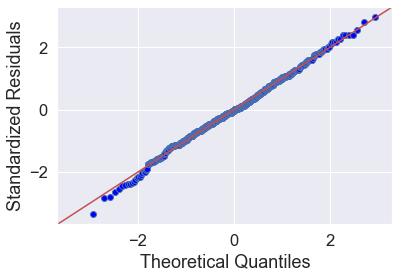

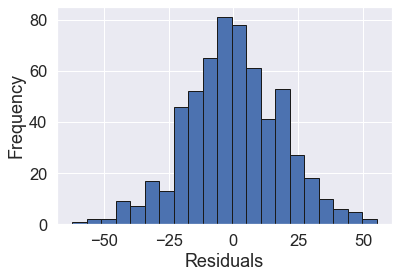

In [157]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [155]:
res = stat()
res.tukey_hsd(df=new_severitym1, res_var='Accident_count', xfac_var='DayofWeek', anova_model='Accident_count ~ C(DayofWeek)')
acs=res.tukey_summary

In [158]:
def style_sig(v, props=''):
    return props if (v < 0.02) and (v > 0) else None

s2 = acs.style.applymap(style_sig, props='color:red;background-color: yellow')
s2

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-01-01 18:15:55.700000 to 2019-01-01 18:19:55.896000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mes     3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


In [211]:
# import statsmodels.api as sm

# dflm=df[['ID','Start_Time','State','City','Severity','Weather_Condition', 'Amenity','Bump',
#         'Crossing','Give_Way','Junction','No_Exit','Railway',
#         'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
#         'Turning_Loop','Severity','Temperature(F)','Visibility(mi)','Wind_Chill(F)',
#         'Wind_Speed(mph)','Precipitation(in)']]

# mask=dflm['Severity']>0
# rows,cols=dflm[mask]['Severity'].shape
# print(rows)
# print(cols)

In [ ]:
# maskstart = (dflm['Year'] >= 2016) & (new_severitym1['Month'] >= 7)
# maskend = (new_severitym1['Year'] <= 2019) & (new_severitym1['Month'] <= 11)
# mask=maskstart & maskend
# new_severitym1=new_severitym1[mask]
# new_severitym1

# X = dflm['Severity']   # independent variable
# # y = dflm[['Weather_Condition', 'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
# #         'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop',
# #         'Temperature(F)','Visibility(mi)','Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)']]   # dependent variable

# y = dflm[['Weather_Condition', 'Temperature(F)','Visibility(mi)','Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)']]   # dependent variable

# # to get intercept -- this is optional
# X = sm.add_constant(X)

# # fit the regression model
# reg = sm.GLM(y, X).fit()
# reg.summary()